## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting the Dataset

In [10]:
dataset = pd.read_csv("bill_authentication.csv")

In [11]:
dataset

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [75]:
dataset.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

## Independent and Dependent Variable

In [12]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [44]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [46]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

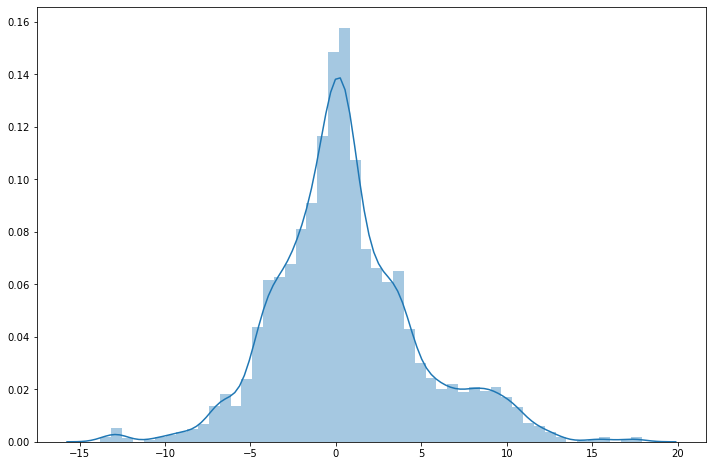

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(X)

## Train_Test_Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree Model

In [54]:
from sklearn import tree
DTModel = tree.DecisionTreeClassifier(criterion='entropy')
DTModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
y_pred=DTModel.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [56]:
DTModel.score(X_test,y_test)

0.9854545454545455

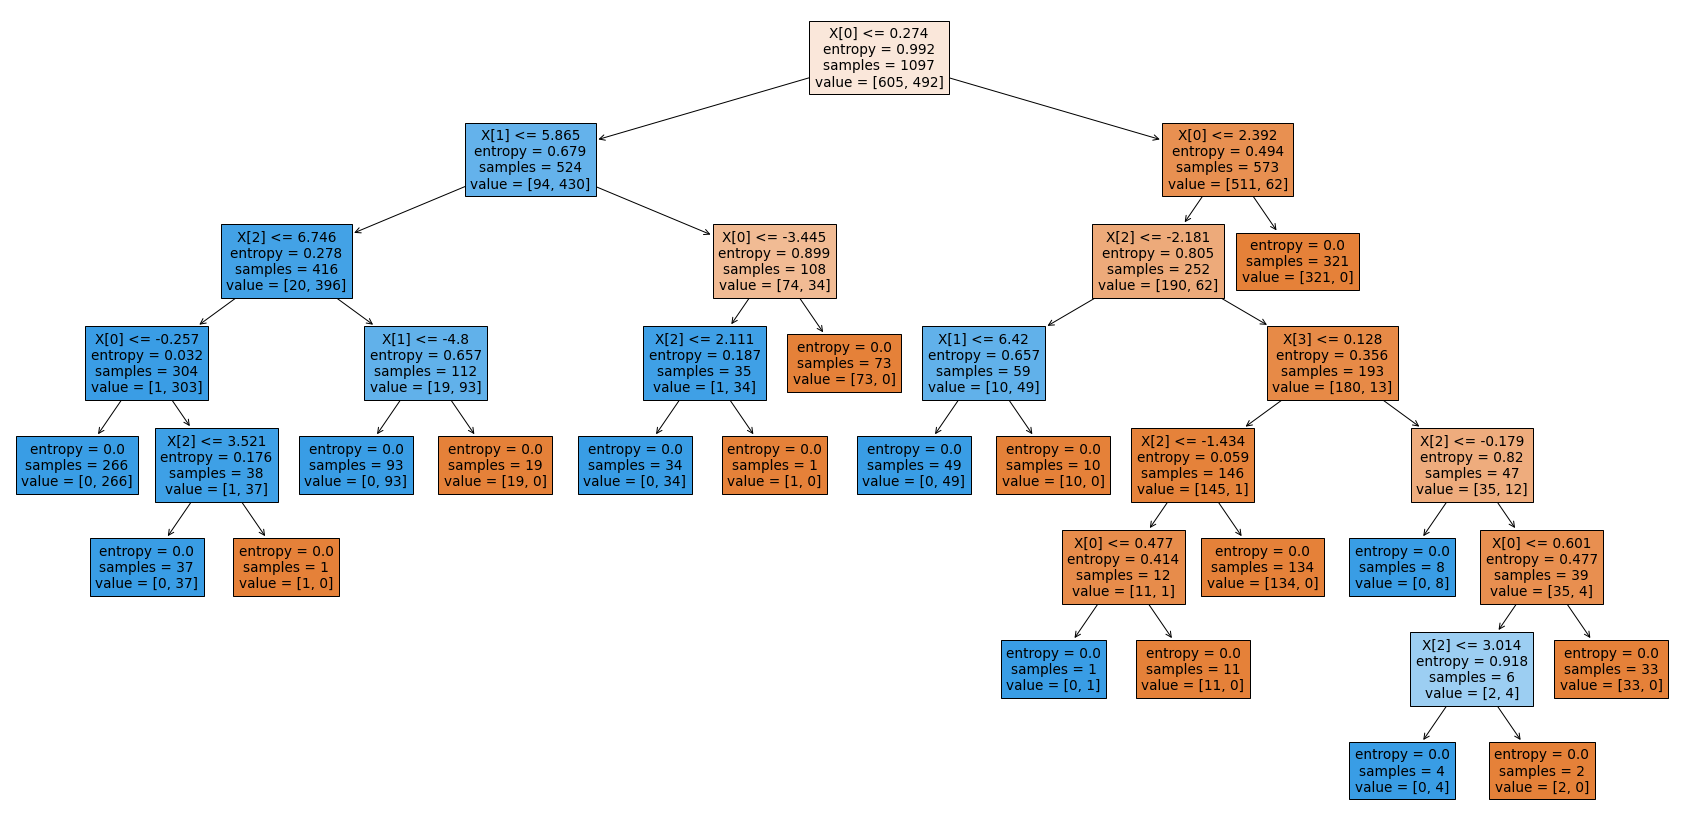

In [78]:
plt.figure(figsize=(30,15))
tree.plot_tree(DTModel,filled=True)
plt.show()

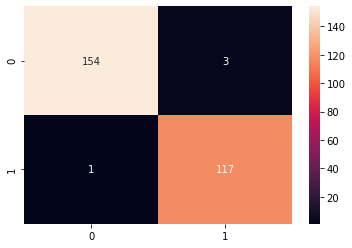

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

## Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_estimators=20,random_state=0)
RFModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [59]:
y_pred = RFModel.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

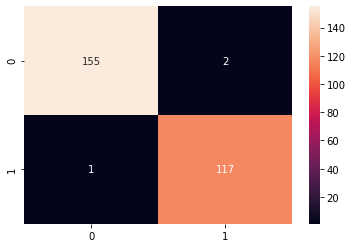

In [60]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [61]:
RFModel.score(X_test,y_test)

0.9890909090909091

## Plotting the Random Forest

In [62]:
from sklearn import tree

In [64]:
RFModel.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

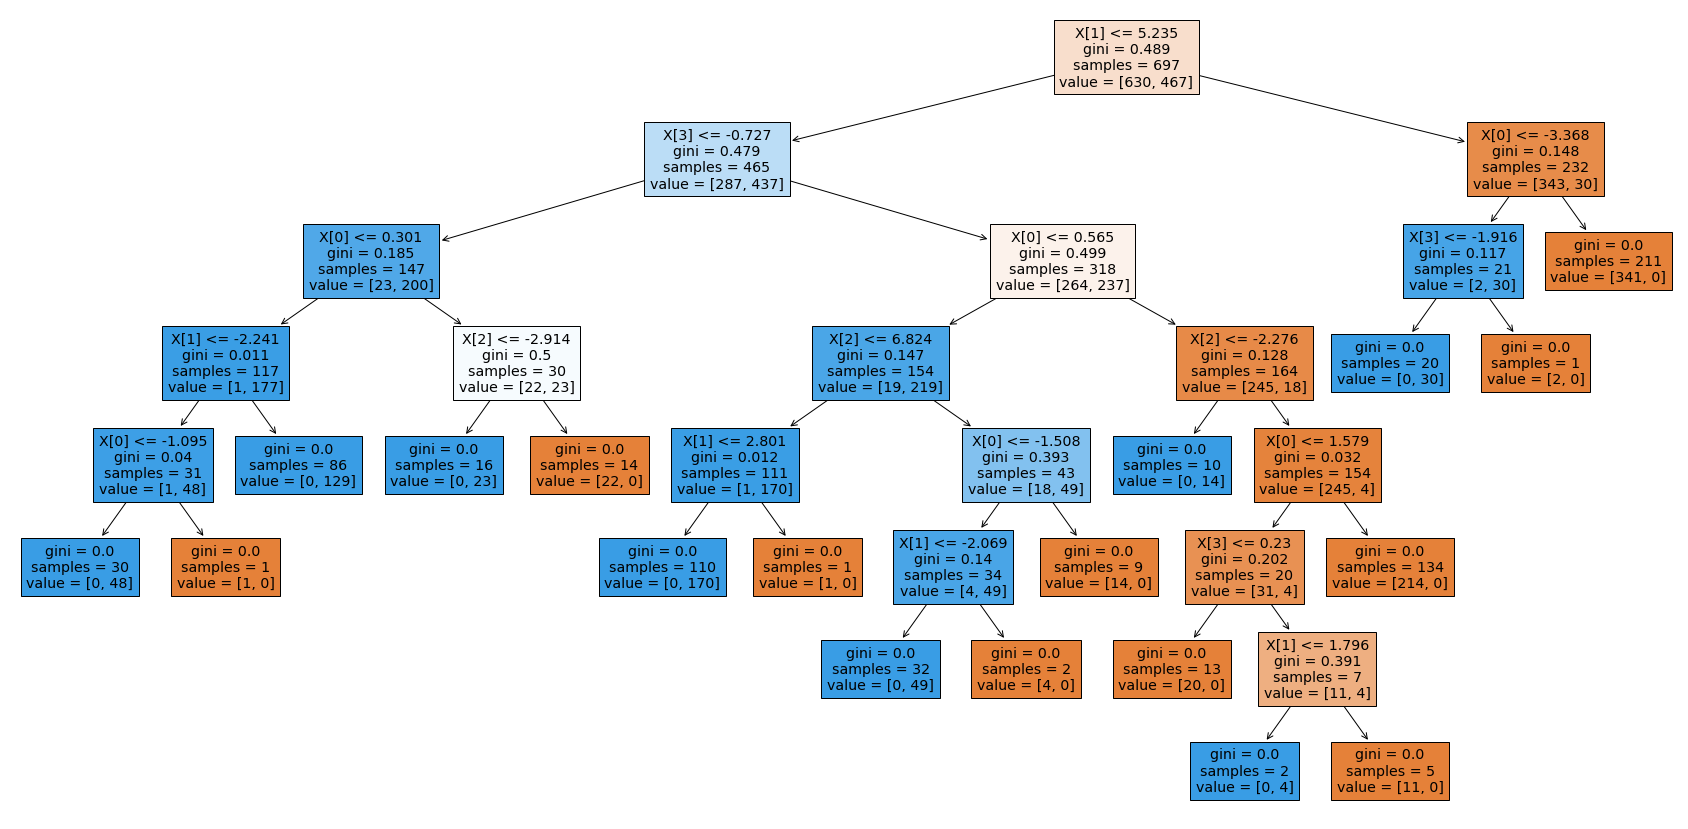

In [76]:
plt.figure(figsize=(30,15))
tree.plot_tree(RFModel.estimators_[5],filled=True)
plt.show()

## Comparision between Decision Tree and Random Forest

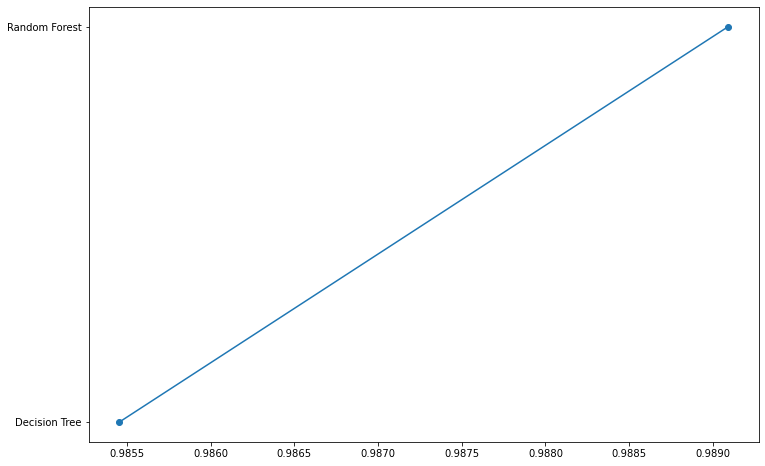

In [72]:
plt.figure(figsize=(12,8))
plt.plot([DTModel.score(X_test,y_test),RFModel.score(X_test,y_test)],["Decision Tree","Random Forest"],marker="o",)